In [1]:
import pandas as pd
import numpy as np
import ast

import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2017_release_.csv')

In [3]:
df.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,23.9,"(21.2, 27.2)",32.5,"(31.5, 33.6)",...,"(73.1, 78.6)",19.6,"(18.2, 21.2)",50.4,"(49.1, 51.6)",5.5,"( 5.0, 6.0)",30.2,"(24.1, 36.3)","(33.57943283260, -86.7228323926)"
1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,28.8,"(25.4, 32.4)",31.3,"(30.0, 32.4)",...,"(70.0, 76.4)",20.2,"(18.5, 22.0)",49.4,"(47.8, 50.8)",5.7,"( 5.1, 6.4)",33.3,"(25.6, 41.0)","(33.54282086860, -86.7524339780)"
2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,26.1,"(22.6, 29.9)",34.6,"(33.2, 35.9)",...,"(69.4, 76.2)",21.1,"(19.1, 23.1)",52.5,"(51.2, 53.7)",6.5,"( 5.8, 7.2)",36.0,"(28.9, 43.5)","(33.56324496330, -86.7640474064)"
3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,28.1,"(24.6, 32.0)",37.8,"(36.3, 39.2)",...,"(67.0, 74.5)",23.1,"(21.0, 25.4)",52.6,"(51.1, 54.0)",8.2,"( 7.3, 9.2)",40.2,"(31.1, 48.9)","(33.54424045940, -86.7749130719)"
4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,31.8,"(27.0, 36.7)",38.5,"(37.1, 39.9)",...,"(62.9, 71.9)",25.8,"(23.5, 28.2)",54.1,"(52.3, 55.6)",9.6,"( 8.5, 10.7)",45.8,"(35.2, 56.1)","(33.55254061390, -86.8016893706)"


In [4]:
# CA, TX & FL has the most number of cities

df.groupby(['StateAbbr']).PlaceName.nunique()

StateAbbr
AK      1
AL      6
AR      5
AZ     12
CA    121
CO     14
CT      8
DC      1
DE      1
FL     33
GA     11
HI      1
IA      6
ID      3
IL     18
IN     11
KS      6
KY      2
LA      6
MA     13
MD      1
ME      1
MI     16
MN      7
MO      8
MS      2
MT      2
NC     14
ND      1
NE      2
NH      2
NJ      9
NM      4
NV      5
NY      9
OH      9
OK      6
OR      8
PA      7
RI      4
SC      5
SD      2
TN      6
TX     47
UT      9
VA     11
VT      1
WA     14
WI      7
WV      1
WY      1
Name: PlaceName, dtype: int64

In [7]:
# filter only one state and select population, diabetes prevalance & geolocation cols

df1 = df[df['StateAbbr'] == "CA"]
df1['Geolocation'] = df1['Geolocation'].apply(lambda g: ast.literal_eval(g))
df1['Geolocation2'] = df1['Geolocation'].apply(Point)

# select only population and diabetes prevalence columns
df1 = df1[['StateAbbr', 'PlaceName', 'Population2010', 'DIABETES_CrudePrev','DIABETES_Crude95CI','Geolocation','Geolocation2']]

/home/jermyn/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/jermyn/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


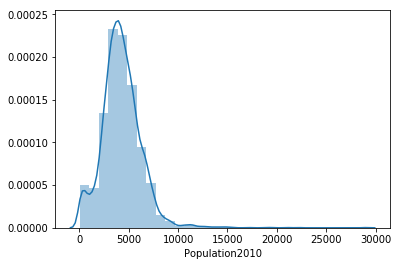

In [8]:
sns.distplot(df1['Population2010'], bins=30)

In [9]:
g_df = gpd.GeoDataFrame(df1, geometry='Geolocation2')

In [10]:
g_df.head()

,StateAbbr,PlaceName,Population2010,DIABETES_CrudePrev,DIABETES_Crude95CI,Geolocation,Geolocation2
230,CA,Santa Maria,147,1.7,"( 1.4, 2.2)","(34.8815493718, -120.449958863)",POINT (34.8815493718 -120.449958863)
1513,CA,Alameda,3646,7.8,"( 7.2, 8.5)","(37.7645625166, -122.231170131)",POINT (37.7645625166 -122.231170131)
1514,CA,Alameda,4107,8.7,"( 8.2, 9.2)","(37.775929832, -122.247776936)",POINT (37.775929832 -122.247776936)
1515,CA,Alameda,4896,10.2,"( 9.6, 10.9)","(37.7811916268, -122.266079332)",POINT (37.7811916268 -122.266079332)
1516,CA,Alameda,4722,10.5,"( 9.9, 11.1)","(37.7778322183, -122.283597907)",POINT (37.7778322183 -122.283597907)


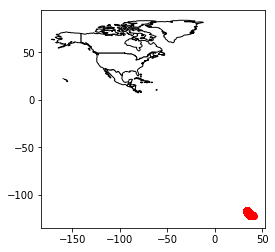

In [11]:
# try to plot CA on map - TODO

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# restrict to America.
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black')

# plot GeoDataFrame.
g_df.plot(ax=ax, color='red')

plt.show()

In [12]:
# groupby city to find average population and diabetes prevalence 

df_grp = df1.groupby(['PlaceName']).agg(['count','mean']).reset_index()

df_grp.columns = df_grp.columns.map('_'.join)
df_grp.head()

,PlaceName_,Population2010_count,Population2010_mean,DIABETES_CrudePrev_count,DIABETES_CrudePrev_mean
0,Alameda,16,4613.250000,16,8.212500
1,Alhambra,20,4154.450000,20,11.475000
2,Anaheim,75,4483.053333,75,9.564000
3,Antioch,20,5118.600000,20,9.675000
4,Apple Valley,12,5758.583333,12,11.741667


In [13]:
# 121 cities in CA

df_grp['Population2010_mean'].describe()

count     121.000000
mean     4466.719785
std       719.867848
min      3315.562500
25%      4010.619048
50%      4385.222222
75%      4824.842105
max      6834.000000
Name: Population2010_mean, dtype: float64

### Question
Write a function for calculating the location entropy of a give dataset.
In this example, we will look at the population entropy for different states.

In [14]:
def entropy_location(df, state):

    ### prepare data
    df2 = df[df['StateAbbr'] == state]

    df2 = df2[['StateAbbr', 'PlaceName', 'Population2010', 'DIABETES_CrudePrev','DIABETES_Crude95CI','Geolocation']]
    
    # groupby city to find average population and diabetes prevalence 
    df_grp2 = df2.groupby(['PlaceName']).agg(['count','mean']).reset_index()
    df_grp2.columns = df_grp2.columns.map('_'.join)

    L = list(df_grp2['Population2010_mean'].values)

    ### calculate entropy
    
    # H = 1, high entropy, disorder
    # H = 0, min entropy, more certainty   
    H = 0
    
    P = np.sum(L)
    
    # sum over all n ==> p_i = 1 
    for Pi in L:
        p_i = Pi / P
        H += -1 * (p_i * np.log2(p_i))
        
    return H

In [15]:
# population entropy for all 121 cities in CA

entropy_location(df, "CA")

6.900867940680344

In [16]:
# population entropy for all 47 cities in TX

entropy_location(df, "TX")

5.519230547932295

In [17]:
# population entropy for all 3 cities in ID

entropy_location(df, "ID")

1.5180888510997415

### Conclusion

The lower the number of cities in a state, the lower the population entropy (more predictable)